In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xlrd  ## Used to read data from .xls file

In [2]:
wb = xlrd.open_workbook('datasets/CTG.xls')
sheet = wb.sheet_by_index(1)

In [3]:
## reading data
data = np.empty([23,2126])
for i in range(0,21):
    for j in range(0,data.shape[1]):
        data[i][j] = sheet.cell_value(2+j,10+i)

for j in range(0,data.shape[1]):
    data[21][j] = sheet.cell_value(2+j,43)
    
for j in range(0,data.shape[1]):
    data[22][j] = sheet.cell_value(2+j,45)
data = data.T

In [4]:
x = np.empty([data.shape[0],21])
for i in range(0,x.shape[0]):
    for j in range(0,x.shape[1]):
        x[i][j] = data[i][j]
y = np.zeros([data.shape[0],10])
for i in range(0,y.shape[0]):
    y[i][int(data[i,21])-1] = 1

In [5]:
## Creating features and labels in train and test set
## 10% of total data is used as test data
x_train1 = x[:int(x.shape[0]*0.9)]
y_train1 = y[:int(x.shape[0]*0.9)]
x_test1 = x[int(x.shape[0]*0.9):]
y_test1 = y[int(x.shape[0]*0.9):]
print(x_train1.shape,y_train1.shape,x_test1.shape,y_test1.shape)

(1913, 21) (1913, 10) (213, 21) (213, 10)


In [6]:
# Normalization of train set
# print(x_train1)
x_train = np.empty(x_train1.shape)
m = []
v = []
for i in range(0,x_train1.shape[1]):
    mean = np.mean(x_train1[:,i])
    var = np.var(x_train1[:,i])
    m.append(mean)
    v.append(var)
    x_train[:,i] = x_train1[:,i] - mean*np.ones(x_train1[:,i].shape)
    x_train[:,i] = x_train[:,i]/var
y_train = y_train1
y_test = y_test1

In [8]:
## Softmax function
def softmax(x):
    tot = np.zeros(x.shape[0])
    res = np.empty(x.shape)
    for i in range(0,x.shape[0]):
        for j in range(0,x.shape[1]):
            tot[i]+=np.min((np.exp(x[i,j]),1e304))      ## np.min() is used to not allow exp() to go beyond bound
    for i in range(0,x.shape[0]):
        for j in range(0,x.shape[1]):
            res[i][j] = np.min((np.exp(x[i][j]),1e304))/tot[i]
    return res

In [9]:
# Training
epochs = 500    ## Number of epochs
w = np.zeros([x_train.shape[1],10])
batch_size = 500     ## Batch Size
batch = int(x_train.shape[0]/batch_size)
lr = 0.00001   ## Learning rate
loss = []
for i in range(0,epochs):
    for b in range(0,batch):
        y_pred = softmax(x_train[b:b+batch_size]@w)
        
        # Uncoment the next line and comment the line following that to use learning rate instead of Hermetion matrix

        w = w - lr*x_train[b:b+batch_size].T@(y_pred - y_train[b:b+batch_size])/y_train.shape[0]        
#         w = w - np.linalg.inv(x_train[b:b+batch_size].T@R@x_train[b:b+batch_size])@x_train[b:b+batch_size].T@(y_pred - y_train[b:b+batch_size])/y_train.shape[0]
    y_pred = softmax(x_train@w)
    l1 = -np.sum(y_train*np.log(y_pred+1e-10) + (1-y_train)*np.log(1-y_pred+1e-10))/y_pred.shape[0]
    print("Epoch",i,"Loss",l1)
    loss.append(l1)

Epoch 0 Loss 2.8757505494142794
Epoch 1 Loss 2.7551054865789997
Epoch 2 Loss 2.6676656120199094
Epoch 3 Loss 2.596554517239089
Epoch 4 Loss 2.5368821728408393
Epoch 5 Loss 2.486079521111047
Epoch 6 Loss 2.4423091182784598
Epoch 7 Loss 2.404149702194341
Epoch 8 Loss 2.3705027578208875
Epoch 9 Loss 2.340526885014604
Epoch 10 Loss 2.313578332818085
Epoch 11 Loss 2.289161144582691
Epoch 12 Loss 2.26688862026224
Epoch 13 Loss 2.246454900664896
Epoch 14 Loss 2.2276144602004484
Epoch 15 Loss 2.210167380574797
Epoch 16 Loss 2.193948722521109
Epoch 17 Loss 2.178820772904203
Epoch 18 Loss 2.1646673129165737
Epoch 19 Loss 2.1513893193499123
Epoch 20 Loss 2.1389016946371573
Epoch 21 Loss 2.127130745698527
Epoch 22 Loss 2.1160122154691465
Epoch 23 Loss 2.1054897278431026


/home/raktim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/home/raktim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


Epoch 24 Loss 2.0955135457496463
Epoch 25 Loss 2.086039569168718
Epoch 26 Loss 2.077028518993222
Epoch 27 Loss 2.0684452663004698
Epoch 28 Loss 2.0602582764852775
Epoch 29 Loss 2.0524391449528294
Epoch 30 Loss 2.0449622064356157
Epoch 31 Loss 2.0378042040083
Epoch 32 Loss 2.0309440068985736
Epoch 33 Loss 2.024362368489036
Epoch 34 Loss 2.0180417176659753
Epoch 35 Loss 2.0119659780265082
Epoch 36 Loss 2.006120410512471
Epoch 37 Loss 2.0004914758643655
Epoch 38 Loss 1.9950667139384826
Epoch 39 Loss 1.989834637449342
Epoch 40 Loss 1.9847846381102296
Epoch 41 Loss 1.9799069034795347
Epoch 42 Loss 1.9751923430887213
Epoch 43 Loss 1.9706325226482784
Epoch 44 Loss 1.9662196053098533
Epoch 45 Loss 1.9619462991101881
Epoch 46 Loss 1.9578058098493858
Epoch 47 Loss 1.9537917987563895
Epoch 48 Loss 1.9498983443869842
Epoch 49 Loss 1.946119908269059
Epoch 50 Loss 1.942451303872956
Epoch 51 Loss 1.9388876685422758
Epoch 52 Loss 1.935424438061349
Epoch 53 Loss 1.932057323578226
Epoch 54 Loss 1.928782

Epoch 269 Loss 1.7617488129301486
Epoch 270 Loss 1.761608706991717
Epoch 271 Loss 1.7614700145239757
Epoch 272 Loss 1.7613327196772168
Epoch 273 Loss 1.7611968067606065
Epoch 274 Loss 1.7610622603606625
Epoch 275 Loss 1.7609290652248766
Epoch 276 Loss 1.760797206389771
Epoch 277 Loss 1.7606666690347499
Epoch 278 Loss 1.7605374385595112
Epoch 279 Loss 1.760409500580027
Epoch 280 Loss 1.760282840884634
Epoch 281 Loss 1.760157445470611
Epoch 282 Loss 1.7600333005403817
Epoch 283 Loss 1.7599103924582442
Epoch 284 Loss 1.7597887077769547
Epoch 285 Loss 1.7596682332539666
Epoch 286 Loss 1.7595489557988517
Epoch 287 Loss 1.7594308625485213
Epoch 288 Loss 1.759313940717553
Epoch 289 Loss 1.7591981777709471
Epoch 290 Loss 1.7590835613136742
Epoch 291 Loss 1.7589700791074483
Epoch 292 Loss 1.7588577190775654
Epoch 293 Loss 1.7587464693385741
Epoch 294 Loss 1.7586363181246432
Epoch 295 Loss 1.758527253834763
Epoch 296 Loss 1.7584192650017594
Epoch 297 Loss 1.7583123403554384
Epoch 298 Loss 1.7582

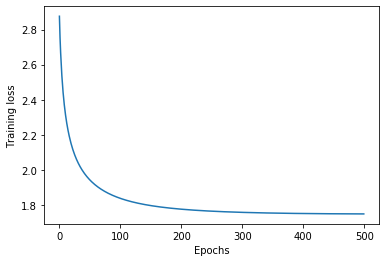

In [10]:
## Plotting the loss
ax = np.arange(len(loss))
plt.plot(ax,loss)
plt.xlabel("Epochs")
plt.ylabel("Training loss")
plt.show()

In [11]:
# Normalization of test set
x_test = np.empty(x_test1.shape)
for i in range(0,x_test1.shape[1]):
    x_test[:,i] = x_test1[:,i] - m[i]*np.ones(x_test1[:,i].shape)
    x_test[:,i] = x_test[:,i]/v[i]

In [12]:
## Predicting on test set and finding accuracy
print("Predicting on test set")
y_hat_t = softmax(x_test@w)
loss = -np.sum(y_test*np.log(y_hat_t+1e-10) + (1-y_test)*np.log(1-y_hat_t+1e-10))/y_hat_t.shape[0]
print("Testing loss =",loss)
y_hat = np.zeros(y_hat_t.shape)
for i in range(0,y_hat.shape[0]):
    ind = np.argmax(y_hat_t[i])
    y_hat[i][ind] = 1
        
tot = 0.0
for i in range(0,y_hat.shape[0]):
    t = 0
    for j in range(0,y_hat.shape[1]):
        if(y_hat[i][j]!=y_test[i][j]):
            t = 1
    if(t==0):
        tot+=1
print("Testing accuracy =",(tot/y_hat.shape[0])*100,"%")

Predicting on test set
Testing loss = 1.075719585200493
Testing accuracy = 90.61032863849765 %
